In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
data = pd.read_excel('/content/cpcb_dly_aq_tamil_nadu-2014.xlsx')
data.columns = data.columns.str.replace('\s+', '_')
data.head()

<ipython-input-3-47a1d8497496>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace('\s+', '_')


,Stn_Code,Sampling_Date,State,City/Town/Village/Area,Location_of_Monitoring_Station,Agency,Type_of_Location,SO2,NO2,RSPM/PM10,PM_2.5
0,38,2014-01-02 00:00:00,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN
1,38,2014-01-07 00:00:00,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN
2,38,21-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN
3,38,23-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN
4,38,28-01-14,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN


In [ ]:
data['formatted_date'] = data['Sampling_Date'].dt.strftime('%Y-%m-%d')

In [ ]:
data.head()

,Stn_Code,Sampling_Date,State,City/Town/Village/Area,Location_of_Monitoring_Station,Agency,Type_of_Location,SO2,NO2,RSPM/PM10,PM_2.5,formatted_date
0,38,2014-01-02,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,11.0,17.0,55.0,NaN,2014-01-02
1,38,2014-01-07,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,17.0,45.0,NaN,2014-01-07
2,38,2014-01-21,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,12.0,18.0,50.0,NaN,2014-01-21
3,38,2014-01-23,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,15.0,16.0,46.0,NaN,2014-01-23
4,38,2014-01-28,Tamil Nadu,Chennai,"Kathivakkam, Municipal Kalyana Mandapam, Chennai",Tamilnadu State Pollution Control Board,Industrial Area,13.0,14.0,42.0,NaN,2014-01-28


In [ ]:
agg_df = data.groupby(['City/Town/Village/Area']).agg({'SO2': 'mean', 'NO2': 'mean'}).reset_index()
agg_df.head()

,City/Town/Village/Area,SO2,NO2
0,Chennai,13.014042,22.088442
1,Coimbatore,4.541096,25.325342
2,Cuddalore,8.965986,19.710884
3,Madurai,13.319728,25.768707
4,Mettur,8.429268,23.185366


In [ ]:
agg_df = data.groupby(['Sampling_Date']).agg({'SO2': 'mean', 'NO2': 'mean'}).reset_index()
agg_df.head()

,Sampling_Date,SO2,NO2
0,2014-01-02,12.272727,19.272727
1,2014-01-03,11.461538,24.153846
2,2014-01-04,9.000000,21.250000
3,2014-01-06,12.727273,22.000000
4,2014-01-07,12.230769,26.615385


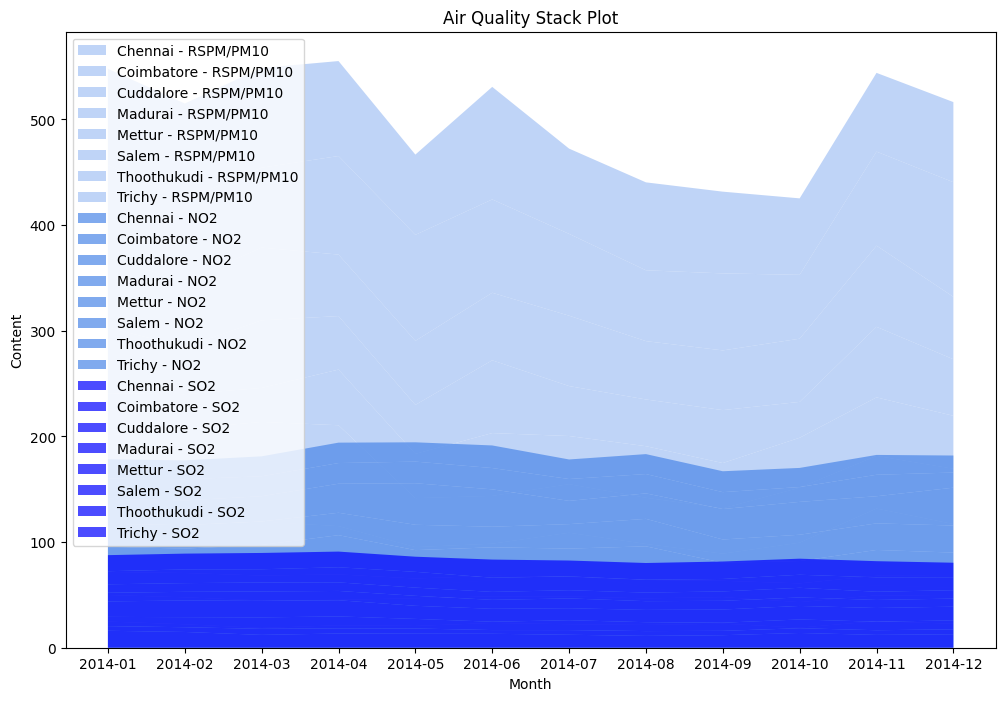

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Aggregate data
data['Sampling_Date'] = pd.to_datetime(data['Sampling_Date'], errors='coerce')
data['formatted_date'] = data['Sampling_Date'].dt.strftime('%Y-%m-%d')
data['month'] = data['Sampling_Date'].dt.to_period('M')
agg_df = data.groupby(['City/Town/Village/Area', 'month']).agg({'SO2': 'mean', 'NO2': 'mean', 'RSPM/PM10': 'mean'}).reset_index()

def get_max_city(df, pollutant):
    max_city = df.loc[df[pollutant].idxmax()]['City/Town/Village/Area']
    return max_city

def plot_stack_plot(df, pollutants):
    plt.figure(figsize=(12, 8))

    # Get unique cities and months
    cities = df['City/Town/Village/Area'].unique()
    months = df['month'].unique()

    # Define distinct colors for pollutants
    colors = {'NO2': '#4a86e8', 'SO2': '#0000ff', 'RSPM/PM10': '#a4c2f4'}

    for i, pollutant in enumerate(pollutants):
        max_city_mapping = {month: get_max_city(df[df['month'] == month], pollutant) for month in months}
        max_city_values = [max_city_mapping[month] for month in df['month']]

        plt.stackplot(months.astype(str), *[df[df['City/Town/Village/Area'] == city][pollutant] for city in cities],
                      labels=[f'{city} - {pollutant}' for city in cities], colors=[colors[pollutant]], alpha=0.7)

    plt.legend(loc='upper left')
    plt.title('Air Quality Stack Plot')
    plt.xlabel('Month')
    plt.ylabel('Content')
    plt.show()

# Plot stack plot with NO2, SO2, and RSPM
plot_stack_plot(agg_df, ['RSPM/PM10','NO2', 'SO2'])
